# Life Expectancy and GDP

Import libraries that we will need further

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


import data and have a loof at it.

In [2]:
# import the data into panda dataframe
all_data = pd.read_csv('all_data.csv')

# have a look to the data
print(all_data.info())
print('\n')
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


We have a dataframe of 4 columns: 
Country - string: country which data are describing

Year - integer: year 

Life expectancy at birth - float: average length of life of actual born individuals in the given year/country.

GDP - float: Gross domestic product (GDP) is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period (here: one year).

We may want to rename Life Expectancy column to be easier to use and convert GDP in billions $.

In [3]:
# change column name
all_data.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'}, inplace=True)

# convert GDP in trillions
all_data.GDP = all_data.GDP / 1000000000000


# check if changes is effective
print(all_data.head())

  Country  Year  Life_expectancy       GDP
0   Chile  2000             77.3  0.077861
1   Chile  2001             77.3  0.070980
2   Chile  2002             77.8  0.069737
3   Chile  2003             77.9  0.075643
4   Chile  2004             78.0  0.099210


Will also be interesting to know how many countries are included in the data and which ones:

In [4]:
# How many countries do we have and what are they ?
print(all_data.Country.unique())
print(all_data.Year.unique())
print(all_data.Year.nunique())

# Period of the data

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
16


## 2. How have the GDP and Life expectancy evolved between 2000 and 2015

We will show the evolution year by year with a animated bar chart to compare evolution in each country.

### 1. we will import the needed library and then arrange data

In [5]:
# import needed library
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#arrange the data
chl = all_data.GDP[all_data.Country == 'Chile'].values
chn = all_data.GDP[all_data.Country == 'China'].values
ger = all_data.GDP[all_data.Country == 'Germany'].values
mex = all_data.GDP[all_data.Country == 'Mexico'].values
usa = all_data.GDP[all_data.Country == 'United States of America'].values
zim = all_data.GDP[all_data.Country == 'Zimbabwe'].values

sns.set_style("whitegrid", {"grid.color": ".9"})

### 2. Figure and axes

In [6]:
# Enable interactive plot
%matplotlib notebook
plt.ioff()

# create figure and axes
fig1 = plt.figure(figsize=(12, 6))
ax = fig1.add_subplot(1, 1, 1)
ax.set_xlim(0, max(all_data.GDP.values))
bars = ax.barh(range(6), (0, 0, 0, 0, 0, 0))
ax.set_xlabel('Trillions $')

# define palette
pal = sns.color_palette()
# animate function that we will pass into FuncAnimation as an argument to animate the chart

def animate(i):
    x1 = chl[i]
    x2 = chn[i]
    x3 = ger[i]
    x4 = mex[i]
    x5 = usa[i]
    x6 = zim[i]
    xs = sorted([x1, x2, x3, x4, x5, x6])

#manage the ticks that it updates at each frame
    tickdic = {'Chile': (x1, pal[9]), 'China': (x2, pal[3]), 'Germany': (x3, 'dimgray'), 'Mexico': (x4, pal[2]), 'USA': (x5, 'steelblue'), 'Zimbabwe': (x6, pal[8])}
    sorted_tickdic = sorted(tickdic.items(), key=lambda x: x[1][0])
    y_ticks = [i[0] for i in sorted_tickdic]  
    colors = [i[1][1] for i in sorted_tickdic]
       
# plot the chart as values are sorted 
    for bar, x, color in zip(bars, xs, colors):
        bar.set_width(x)
        bar.set_color(color)

    plt.title('GDP in trillions dollars, Year: {}'.format(2000 + i))
    plt.yticks(np.arange(6), y_ticks)

#run the animation
ani = FuncAnimation(fig1, animate, frames=16, interval=1000)

# save the animation as a gif
f = r"C:\Users\josse\Documents\GitHub\Life-Expectancy-and-GDP-Starter\gdp_evolution.gif"
writergif = animation.PillowWriter(fps=1)
ani.save(f, writer=writergif)


![](https://github.com/jossbnd/Life-Expectancy-and-GDP-Starter/blob/main/gdp_evolution.gif)

In [7]:
# plt.close('all')


# 2. Compare evolution of life expectancy

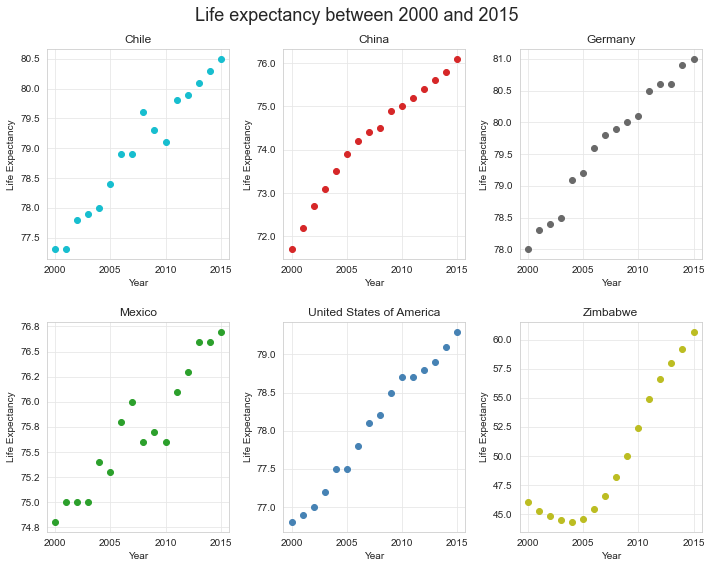

In [8]:
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

countries = all_data.Country.unique()
colordic = {'Chile': pal[9], 'China': pal[3], 'Germany': 'dimgray', 'Mexico': pal[2], 'United States of America': 'steelblue', 'Zimbabwe': pal[8]}

fig2 = plt.figure(figsize=(10, 8))

for country, i in zip(countries, range(len(countries))):
    ax = plt.subplot(2, 3, i+1)
    ax.scatter(all_data.Year[all_data.Country == country], all_data.Life_expectancy[all_data.Country == country], color=colordic[country])
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy', rotation=90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_title(country)

plt.suptitle('Life expectancy between 2000 and 2015', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(hspace=0.30)
plt.show()


# 3. Compare GDP between two countries

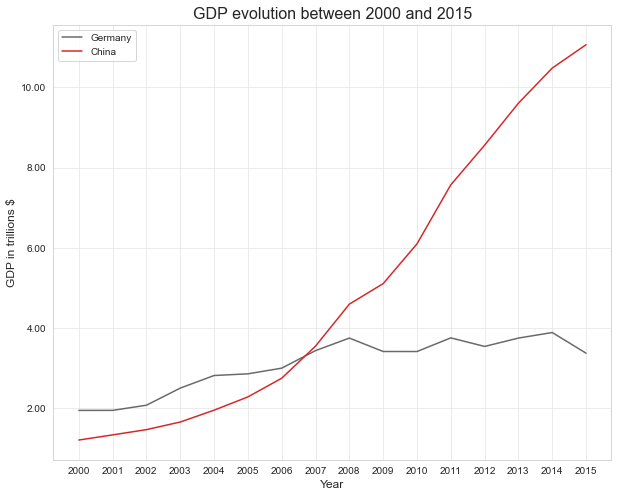

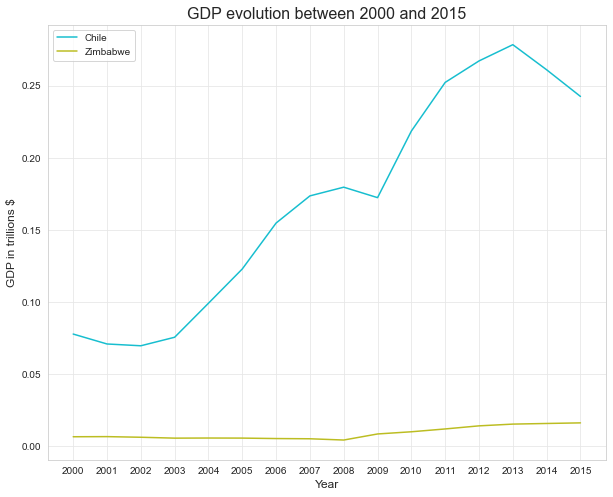

In [9]:
from matplotlib.ticker import FormatStrFormatter
colordic = {'Chile': pal[9], 'China': pal[3], 'Germany': 'dimgray', 'Mexico': pal[2], 'United States of America': 'steelblue', 'Zimbabwe': pal[8]}
years = all_data.Year.unique()


def compare_gdp(country1, country2):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    sns.lineplot(data = all_data[all_data.Country == country1], x='Year', y='GDP', color=colordic[country1])
    sns.lineplot(data = all_data[all_data.Country == country2], x='Year', y='GDP', color=colordic[country2])
    plt.legend([country1, country2])
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('GDP in trillions $', fontsize=12)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xticks(years)
    
    plt.title('GDP evolution between 2000 and 2015', fontsize=16)

compare_gdp('Germany', 'China')
compare_gdp('Chile', 'Zimbabwe')



# 4. Relationship between GDP and life expectancy

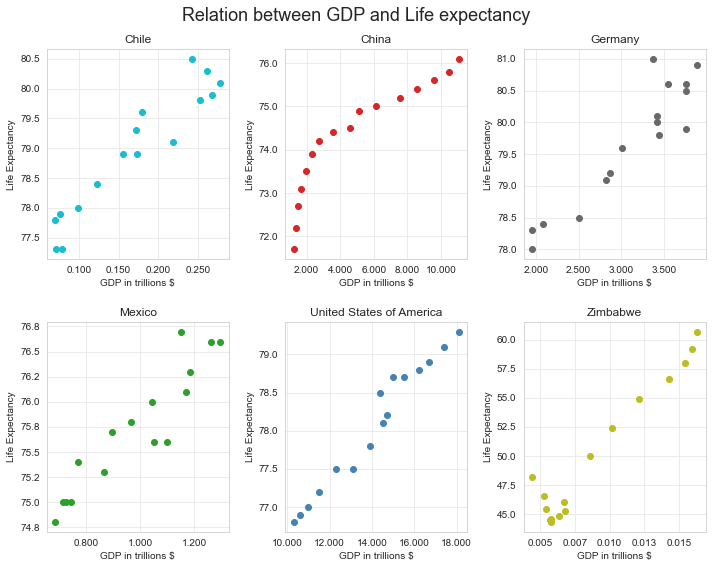

In [10]:
%matplotlib inline

from matplotlib.ticker import FormatStrFormatter

countries = all_data.Country.unique()
colordic = {'Chile': pal[9], 'China': pal[3], 'Germany': 'dimgray', 'Mexico': pal[2], 'United States of America': 'steelblue', 'Zimbabwe': pal[8]}

fig2 = plt.figure(figsize=(10, 8))

for country, i in zip(countries, range(len(countries))):
    ax = plt.subplot(2, 3, i+1)
    ax.scatter(all_data.GDP[all_data.Country == country], all_data.Life_expectancy[all_data.Country == country], color=colordic[country])
    ax.set_xlabel('GDP in trillions $')
    ax.set_ylabel('Life Expectancy', rotation=90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.set_title(country)

plt.suptitle('Relation between GDP and Life expectancy', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(hspace=0.30)
plt.show()




Figure(576x576)
AxesSubplot(0.125,0.125;0.775x0.755)


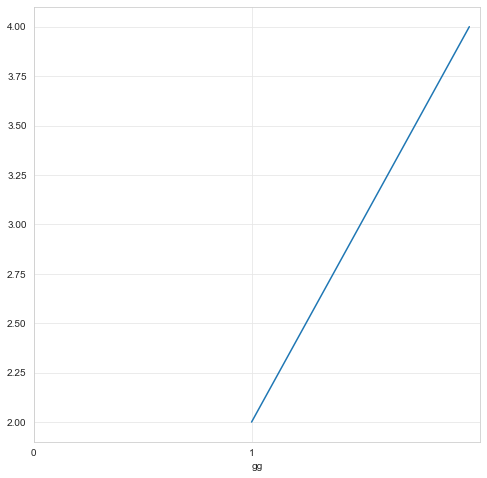

In [11]:
%matplotlib inline
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot()
ax.plot([1, 2], [2, 4])
ax.set_xticks(range(2))
ax.set_xlabel('gg')

print(fig2)
print(ax)

plt.show()